In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import json
import datadict
import functions
import devices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = datadict.DataFile("data_new_PV.json")

# print default impact value (climate change for the cell of monocrystalline)
data.impact_value()

236.53465

In [5]:
data.get_layers()
data.layer_selected = "Cell"

data.get_layer_options()
data.layer_options
data.layer_option_selected = 'cell'


data.get_locations()
data.locations
data.location_selected = 'RER'


In [277]:
all_layers = []

for module in data.module_types:
    # print(module)
    data.module_type_selected = module
    data.get_layers()

    for l in data.layers:
        all_layers.append(l)
        


In [278]:
base_dict = {}

for module in data.module_types:
    data.module_type_selected = module
    data.get_layers()
    base_dict[module] = {}
    
    for l in data.layers:
    
        data.layer_selected = l 
        data.get_layer_options()
        base_dict[module][l] = data.layer_options
        
base_dict

{'Organic PV': {'Back electrode': ['Aluminum production'],
  'Electron transport layer': ['Lithium fluoride'],
  'Substrate': ['PET'],
  'Encapsulant': ['PET'],
  'FTO': ['Indium tin oxide', 'Tin dioxide', 'Fluorine production'],
  'Hole transport layer': ['Polystyrene',
   'Polyvinylfluoride production',
   'Molybdenum trioxide production'],
  'P3HT': ['Bromine',
   'Electricity medium voltage',
   'Hexane production',
   'Thiophene - Butanes production',
   'Thiophene - Sulphur',
   'Heat, heavy fuel oil'],
  'PCBM': ['Methanol',
   'Solvent organic',
   'Electricity medium voltage',
   'Monochlorobenzene',
   'Nitrogen',
   'o-Dichlorobenzene',
   'Pyridine-compounds',
   'Toluene',
   'Xylene'],
  'Front cover': ['Glass', 'Tempering', 'Polycarbonate'],
  'Rear cover': ['Polyvinylfluoride film',
   'Polyethylene terephthalate',
   'Flat glass, uncoated'],
  'Junction box': ['Glass fibre reinforced plastic'],
  'Wires': ['Copper'],
  'Electricity for assembly': ['Electricity medium v

In [279]:
data.data_dict['Inverter'].keys()

dict_keys(['Additional data', '0.5 kW', '2.5 kW', '500 kW'])

In [280]:
data.module_types

['Organic PV',
 'Silicon tandem',
 'Monocrystalline',
 'Polycrystalline',
 'CdTe',
 'CIGS']

In [281]:
data.cell_type_selected = 'CIGS'

In [282]:
data.get_layers()
data.layers

['Frame',
 'Front cover',
 'TCO',
 'Encapsulant',
 'Cell',
 'Rear cover',
 'Junction box',
 'Wires',
 'Electricity for assembly']

In [283]:
data.layer_selected = 'Cell'

In [284]:
data.get_layer_options(data.cell_type_selected, data.layer_selected)
data.layer_options


TypeError: DataFile.get_layer_options() takes 1 positional argument but 3 were given

In [292]:
data.layer_option_selected = 'cell'

In [ ]:
data.location_selected = 'RoW'

In [ ]:
for impact_category in data.impact_categories:
    data.impact_category_selected = impact_category
    print(impact_category, data.impact_value()
          )

climate change 212.48394
fossil 2659.46642
agricultural land occupation 11.55653
ozone depletion 2e-05
terrestrial acidification 0.81391
photochemical oxidant formation 0.77945
metal depletion 11.72803
water depletion 7.06593
freshwater ecotoxicity 7.10556
urban land occupation 1.19636
particulate matter formation 0.50605
freshwater eutrophication 0.10367
natural land transformation -0.01591
marine eutrophication 0.08936
ionising radiation 23.47258


# What are all of the location options?


In [ ]:
data.module_types

['Organic PV',
 'Silicon tandem',
 'Monocrystalline',
 'Polycrystalline',
 'CdTe',
 'CIGS']

In [ ]:
locations = []

for module_type in data.module_types:
    data.module_type_selected = module_type
    data.get_layers()
    for layer in data.layers:
        data.layer_selected = layer
        data.get_layer_options()
        for layer_option in data.layer_options:
            data.layer_option_selected = layer_option
            data.get_locations()
            for location in data.locations:
                locations.append(location)
                
list(set(locations))

['WECC-US',
 'ZA',
 'PE',
 'RAS',
 'Asia without China and GCC',
 'CN',
 'RoW',
 'CO',
 'ROW',
 'CA-QC',
 'GLO',
 'Asia without China',
 'IN',
 'BR',
 'US-WECC',
 'RER',
 'US',
 'CH',
 'Europe without Switzerland']

In [ ]:
['RER',
 'WECC-US',
 'CA-QC',
 'US',
 'ROW',
 'CN',
 'GLO',
 'RoW',
 'Asia without China']

# Test System

In [17]:
my_sys = devices.System("cdte")
my_sys.system_loss_factor = 0
print(my_sys.n_devices)
print(my_sys.system_output(800,20), "kWh")
print(my_sys.n_devices * my_sys.device.P_ref)

5
1584.2937200000001 kWh
2150


In [3]:


g_eff_range = np.linspace(0,1000,100)#np.arange(1,1000,2)
t_amb = 25

all_data = {}

for device_name in ["monocrystalline", "polycrystalline", "cdte", "cigs", "organic", "perovskite"]:
    print(device_name)
    all_data[device_name] = {}
    my_sys = devices.System(device_name)
    my_sys.system_loss_factor = 0

    impact_value = my_sys.device.default_impact * my_sys.device.module_area

    my_data = {}

    self_suff_iterate = np.arange(0.05,0.95+0.01,0.05).round(2)
    # [0.01] + list(np.arange(0.05,1.01,0.05).round(2))
    for self_sufficiency_factor in self_suff_iterate:
        sys_impact = []
        for g_eff in g_eff_range:
            my_sys.system_output(g_eff,t_amb)
            sys_impact.append(my_sys.system_cumulative_impact(impact_value, self_sufficiency_factor))
        # if self_sufficiency_factor in [0.01, 0.50, 1.00]:
        all_data[device_name][self_sufficiency_factor] = {}
        df = pd.DataFrame({"Impact":sys_impact,
                "Irradiance":g_eff_range})
        df = df[df['Impact']<=2]
        df = df[df['Irradiance']<=1200]#.to_csv(f"/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curve_{self_sufficiency_factor}.csv",index=None)
        df = df.round(3)
        all_data[device_name][self_sufficiency_factor]['Impact'] = df['Impact'].tolist()
        all_data[device_name][self_sufficiency_factor]['Irradiance'] = df['Irradiance'].tolist()
with open("/Users/jmccarty/GitHub/parametric-bipv-app/static/data/sample_curves_all.json","w") as fp:
    json.dump(all_data, fp)

/Users/jmccarty/GitHub/parametric-bipv-app/notebooks/devices.py:49: RuntimeWarning: divide by zero encountered in scalar divide
  self.system_impact_generation = self.system_impact / self.system_mitigated_lifetime_kwh


In [6]:
all_data['monocrystalline']

{0.05: {'Impact': [], 'Irradiance': []},
 0.1: {'Impact': [1.985,
   1.961,
   1.938,
   1.915,
   1.893,
   1.872,
   1.851,
   1.831,
   1.811,
   1.791,
   1.772,
   1.754,
   1.736,
   1.718,
   1.701,
   1.684,
   1.668,
   1.651,
   1.636,
   1.62,
   1.605,
   1.591,
   1.576,
   1.562,
   1.548,
   1.535],
  'Irradiance': [747.475,
   757.576,
   767.677,
   777.778,
   787.879,
   797.98,
   808.081,
   818.182,
   828.283,
   838.384,
   848.485,
   858.586,
   868.687,
   878.788,
   888.889,
   898.99,
   909.091,
   919.192,
   929.293,
   939.394,
   949.495,
   959.596,
   969.697,
   979.798,
   989.899,
   1000.0]},
 0.15: {'Impact': [1.972,
   1.934,
   1.898,
   1.863,
   1.83,
   1.798,
   1.767,
   1.737,
   1.708,
   1.68,
   1.653,
   1.627,
   1.602,
   1.578,
   1.555,
   1.532,
   1.51,
   1.489,
   1.468,
   1.448,
   1.429,
   1.41,
   1.392,
   1.374,
   1.357,
   1.34,
   1.323,
   1.307,
   1.292,
   1.277,
   1.262,
   1.248,
   1.234,
   1.22,
   1.207,

In [4]:
functions.pv_watts_method(1000, 25, my_sys.device.P_ref, my_sys.device.gamma)

325.0

In [7]:
data = datadict.DataFile("data_new_PV.json")


# my_sys.system_cumulative_impact(data.impact_value())

In [86]:
[0.01] + list(np.arange(0.05,1.01,0.05).round(2))

np.arange(0.05,0.96,0.05).round(2)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

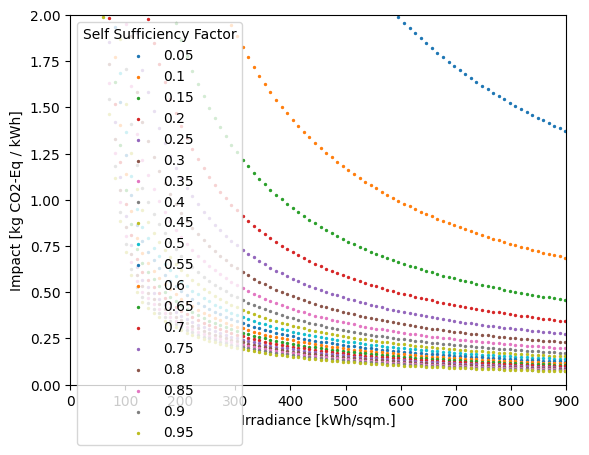

In [92]:

g_eff_range = np.linspace(0,1000,100)#np.arange(1,1000,2)
t_amb = 25

sys_impact_a = []
self_sufficiency_factor = 0.9
for g_eff in g_eff_range:
    my_sys.system_output(g_eff,t_amb)
    sys_impact_a.append(my_sys.system_cumulative_impact(data.impact_value(), self_sufficiency_factor))

sys_impact_b = []
self_sufficiency_factor = 0.5
for g_eff in g_eff_range:
    my_sys.system_output(g_eff,t_amb)
    sys_impact_b.append(my_sys.system_cumulative_impact(data.impact_value(), self_sufficiency_factor))

fig, axe = plt.subplots()

my_data = {}

self_suff_iterate = np.arange(0.05,0.95+0.01,0.05).round(2)
# [0.01] + list(np.arange(0.05,1.01,0.05).round(2))
for self_sufficiency_factor in self_suff_iterate:
    sys_impact = []
    for g_eff in g_eff_range:
        my_sys.system_output(g_eff,t_amb)
        sys_impact.append(my_sys.system_cumulative_impact(data.impact_value(), self_sufficiency_factor))
    axe.scatter(x = g_eff_range,
            y = sys_impact,
            s = 2,
            label=self_sufficiency_factor)
    # if self_sufficiency_factor in [0.01, 0.50, 1.00]:
    my_data[self_sufficiency_factor] = {}
    df = pd.DataFrame({"Impact":sys_impact,
            "Irradiance":g_eff_range})
    df = df[df['Impact']<=2]
    df = df[df['Irradiance']<=1200]#.to_csv(f"/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curve_{self_sufficiency_factor}.csv",index=None)
    df = df.round(3)
    my_data[self_sufficiency_factor]['Impact'] = df['Impact'].tolist()
    my_data[self_sufficiency_factor]['Irradiance'] = df['Irradiance'].tolist()
        
plt.ylim(0,2)
plt.xlim(0,900)

plt.ylabel("Impact [kg CO2-Eq / kWh]")
plt.xlabel("Irradiance [kWh/sqm.]")
# plt.title(self_sufficiency_factor)
plt.legend(title="Self Sufficiency Factor")

with open("/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curves.json","w") as fp:
    json.dump(my_data, fp)

In [96]:
len(my_data[.95]['Irradiance'])

94

In [78]:
import json


# Build Website Features

In [20]:
base_dict = {}

for module in data.module_types:
    data.module_type_selected = module
    data.get_layers()
    base_dict[module] = {}
    
    for l in data.layers:
    
        data.layer_selected = l 
        data.get_layer_options()
        # if len(data.layer_options)<2:
        #     pass
        # else:
        base_dict[module][l] = {}
        base_dict[module][l]['Options'] = data.layer_options
        
        layer_option_locations = {}
        for option in data.layer_options:
            data.layer_option_selected = option
            data.get_locations()
            layer_option_locations[option] = data.locations
            
        base_dict[module][l]['Locations Per Option'] = layer_option_locations

# technology = "Monocrystalline"
technology_data = base_dict["Monocrystalline"]
technology_data

{'Frame': {'Options': ['Aluminium profile'],
  'Locations Per Option': {'Aluminium profile': ['RER', 'RoW', 'GLO']}},
 'Electricity for assembly': {'Options': ['Electricity medium voltage'],
  'Locations Per Option': {'Electricity medium voltage': ['CN',
    'RER',
    'US-WECC',
    'RAS',
    'Asia without China and GCC']}},
 'Front cover': {'Options': ['Glass', 'Tempering', 'Polycarbonate'],
  'Locations Per Option': {'Glass': ['RER', 'RoW'],
   'Tempering': ['RoW', 'RER'],
   'Polycarbonate': ['RoW', 'RER']}},
 'Encapsulant': {'Options': ['EVA', 'Epoxy resin', 'Polyurethane'],
  'Locations Per Option': {'EVA': ['GLO', 'RER', 'RoW'],
   'Epoxy resin': ['RER', 'RoW'],
   'Polyurethane': ['GLO']}},
 'Rear cover': {'Options': ['Polyvinylfluoride film',
   'Polyethylene terephthalate'],
  'Locations Per Option': {'Polyvinylfluoride film': ['RoW', 'US'],
   'Polyethylene terephthalate': ['RER', 'RoW', 'CA-QC']}},
 'Cell': {'Options': ['cell'],
  'Locations Per Option': {'cell': ['RER', '